## The tools that I used in this process:
I used Python(version 2.7), with some data-science related packages like pandas, NumPy and scikit-learn. I simply installed a specific distribution of Python called Anaconda that already bundles those and other most useful libraries for data science.

In [16]:
import os
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

#### Reding *data.csv* with pandas:

In [3]:
data = pd.read_csv('data.csv',index_col=0)

In [4]:
data.head()

,feature1,feature2,feature3,feature4,feature5,response
feature0,,,,,,
0,79.238912,142.521180,83.203680,37.251610,-10.135911,0
1,57.399469,74.782256,12.070260,34.322600,55.482167,1
2,33.516311,76.885951,33.253356,48.988555,69.364048,2
3,32.935693,86.202320,48.548763,42.298201,34.603077,2
4,75.350393,138.191571,75.757699,30.216984,-9.227141,0


Let's have a look at some simple statistics of the **data**:

In [5]:
data.describe()

,feature1,feature2,feature3,feature4,feature5,response
count,101010.000000,101010.000000,101010.000000,101010.000000,101010.000000,101010.000000
mean,55.260527,98.095357,156.296064,38.419451,17.517145,1.000000
std,315.326145,319.631928,31835.520972,36.054187,318.906931,0.816501
min,0.016221,14.914621,-32.369763,-21.224100,-62.965050,0.000000
25%,36.221386,68.220958,18.506533,25.065156,-7.484190,0.000000
50%,50.517651,83.271721,62.100800,36.333816,20.837380,1.000000
75%,73.552712,137.111876,77.102605,51.228244,38.001835,2.000000
max,99999.000000,101010.000000,10111000.000000,9999.000000,101010.000000,2.000000


**max** values of the features seem very big comparing to **mean**, **25**, **50** and **75** percentiles. Investigating the the histogram of the data can help us to spot if there are any outliers:

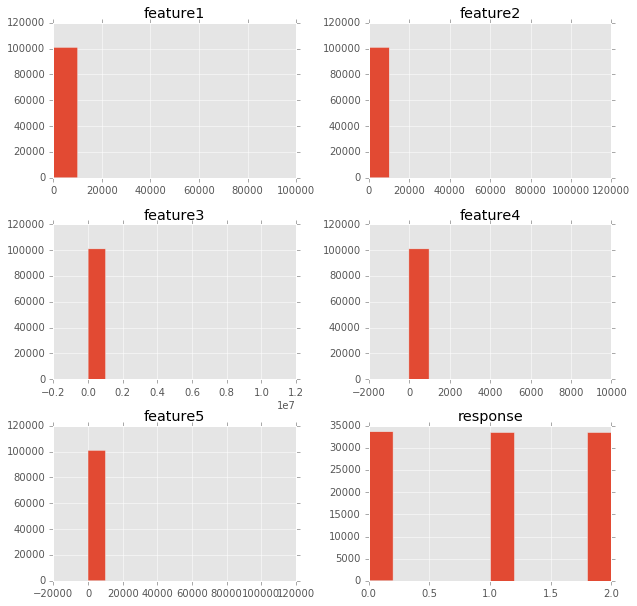

In [6]:
data.hist(figsize=(10,10));

According to the histograms above, there are some **extreme outliers** in all the features. Let's remove all the lines with feature greater than 1000.
#### Filtering:

In [7]:
data = data[data.feature1<1000]
data = data[data.feature2<1000]
data = data[data.feature3<1000]
data = data[data.feature4<1000]
data = data[data.feature5<1000]

#### Looking at the histogram after filterin:

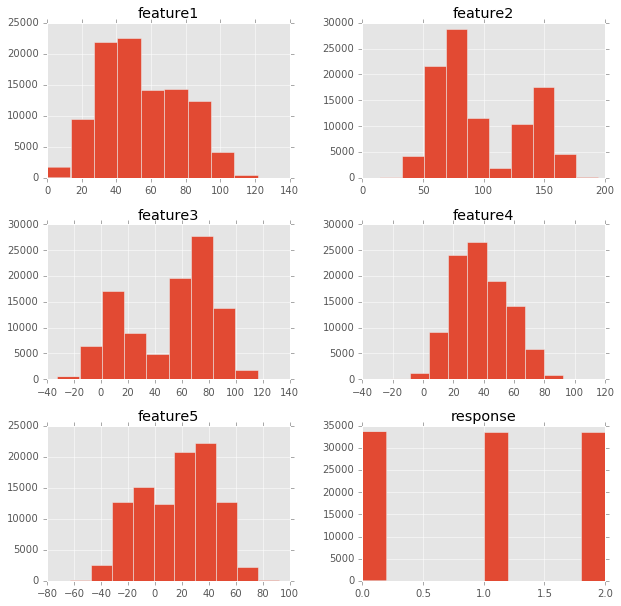

In [8]:
data.hist(figsize=(10,10));

In [9]:
data.describe()

,feature1,feature2,feature3,feature4,feature5,response
count,101003.000000,101003.000000,101003.000000,101003.000000,101003.000000,101003.000000
mean,54.271273,97.095817,51.598118,38.320458,16.517908,1.000010
std,23.235613,36.724728,32.225078,17.823604,26.918931,0.816486
min,0.016221,14.914621,-32.369763,-21.224100,-62.965050,0.000000
25%,36.222403,68.218940,18.504928,25.064747,-7.483637,0.000000
50%,50.517238,83.271411,62.098792,36.333380,20.837865,1.000000
75%,73.552655,137.111422,77.100748,51.227015,38.001464,2.000000
max,135.055901,193.999421,132.637529,104.838178,91.947545,2.000000


While filtering, only **7** lines(*101010* - *101003*) were elminated. Which is very insignificant comparing to the total number of lines(*101010*)

#### Selecting *features* and *the response*:

In [10]:
features = [u'feature1', u'feature2', u'feature3', u'feature4', u'feature5']
X = data[features]
y = data['response']

#### Definition of function *factor_scatter_matrix()* found on [stackoverflow](http://stackoverflow.com/questions/22943894/class-labels-in-pandas-scattermatrix?answertab=active#tab-top)
The default *scatter_matrix()* function in pandas does not have ability to differently color points depending on the response, that is why I use this custom function.

In [11]:
def factor_scatter_matrix(df, factor, palette=None):
    '''Create a scatter matrix of the variables in df, with differently colored
    points depending on the value of df[factor].
    inputs:
        df: pandas.DataFrame containing the columns to be plotted, as well 
            as factor.
        factor: string or pandas.Series. The column indicating which group 
            each row belongs to.
        palette: A list of hex codes, at least as long as the number of groups.
            If omitted, a predefined palette will be used, but it only includes
            9 groups.
    '''
    import matplotlib.colors
    import numpy as np
    from pandas.tools.plotting import scatter_matrix
    from scipy.stats import gaussian_kde

    if isinstance(factor, basestring):
        factor_name = factor #save off the name
        factor = df[factor] #extract column
        df = df.drop(factor_name,axis=1) # remove from df, so it 
        # doesn't get a row and col in the plot.

    classes = list(set(factor))

    if palette is None:
        palette = ['#e41a1c', '#377eb8', '#4eae4b', 
                   '#994fa1', '#ff8101', '#fdfc33', 
                   '#a8572c', '#f482be', '#999999']

    color_map = dict(zip(classes,palette))

    if len(classes) > len(palette):
        raise ValueError('''Too many groups for the number of colors provided.
We only have {} colors in the palette, but you have {}
groups.'''.format(len(palette), len(classes)))

    colors = factor.apply(lambda group: color_map[group])
    axarr = scatter_matrix(df,figsize=(10,10),marker='o',c=colors,diagonal=None)


    for rc in xrange(len(df.columns)):
        for group in classes:
            y = df[factor == group].iloc[:,rc].values
            gkde = gaussian_kde(y)
            ind = np.linspace(y.min(), y.max(), 1000)
            axarr[rc][rc].plot(ind, gkde.evaluate(ind),c=color_map[group])

    return axarr, color_map

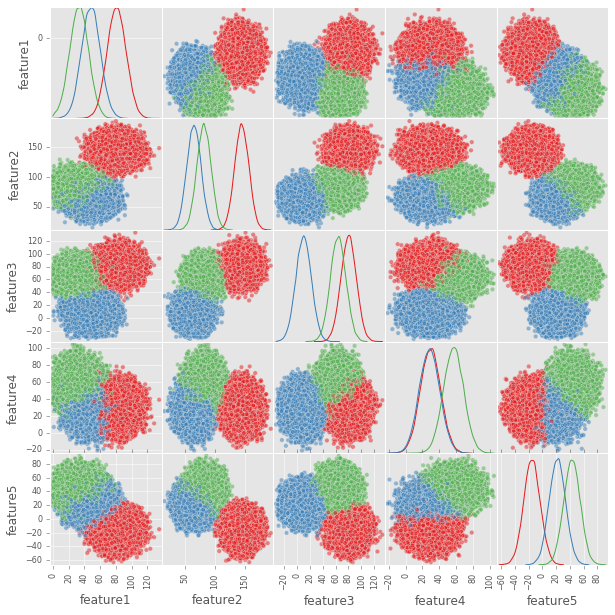

In [12]:
#axarr, color_map = factor_scatter_matrix(X[1:10000],y[1:10000]);
axarr, color_map = factor_scatter_matrix(X,y);
#axarr, color_map = factor_scatter_matrix(X[:,1:10000],y[:,1:10000]);

Scatter matrix neatly organizes all of the pairwise correlation information. Each small chart shows the correlation between the given pair of variables. From this matrix it is easily understood that, **feature2** and **feature3** have very significant effect on the output while the others do not.

## RandomForestClassifier
I want to create a Random.....

#### Splitting *train* and *test* data:

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

#### Tuning for the best parameters:

In [17]:
tuned_parameters = [{'n_estimators':[1,10,100],'min_samples_split':[2,4]}]

clf = GridSearchCV(RandomForestClassifier(),tuned_parameters,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)

print "Best Parameters:"
print clf.best_params_

Best Parameters:
{'min_samples_split': 2, 'n_estimators': 100}


#### The optimized classifier

In [19]:
opt_clf = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], # Number of trees
                                  min_samples_split=clf.best_params_['min_samples_split'], # minimum number of samples required
                                  max_features=5,    # Num features considered
                                  oob_score=True)

In [ ]:
scores = cross_val_score(opt_clf, X, y,cv=5)
print scores.mean()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
fitted = opt_clf.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,fitted.predict(X_test),labels=[0, 1, 2])

In [ ]:
print confusion_matrix